## Using datetime object in **pandas** 

In this notebook, I demonstrate how to handle dates using the *datetime* object in *pandas*, and then I explore how to make beaultiful plots using *seaboarn*. 

In [4]:
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import earthpy as et 
import pandas as pd

#register matplotlib converters to handle datetime conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#set seaborn plot background 
sns.set(font_scale = 1.5, style = "whitegrid")


Now I will get the csv data of temperature and precipitation in July 2018 for Boulder, Colorado, USA.

In [5]:
file_url = "https://ndownloader.figshare.com/files/12948515"
et.data.get_data(url=file_url)

os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

file_path = os.path.join("data","earthpy-downloads","july-2018-temperature-precip.csv")

boulder_july_2018 = pd.read_csv(file_path)


In [6]:
# see the first n values from the dataframe, n=5 if not mentioned
boulder_july_2018.head()

,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


In [7]:
# getting information about the dataframe
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   max_temp  31 non-null     int64  
 2   precip    31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


In [8]:
#see the datatypes of the dataframe columns
boulder_july_2018.dtypes

date         object
max_temp      int64
precip      float64
dtype: object

It exhibits the same problem as the previous notebook. As the date column is treated as an object not datetime.If we try to plot from this dataframe, we get the following plot. 

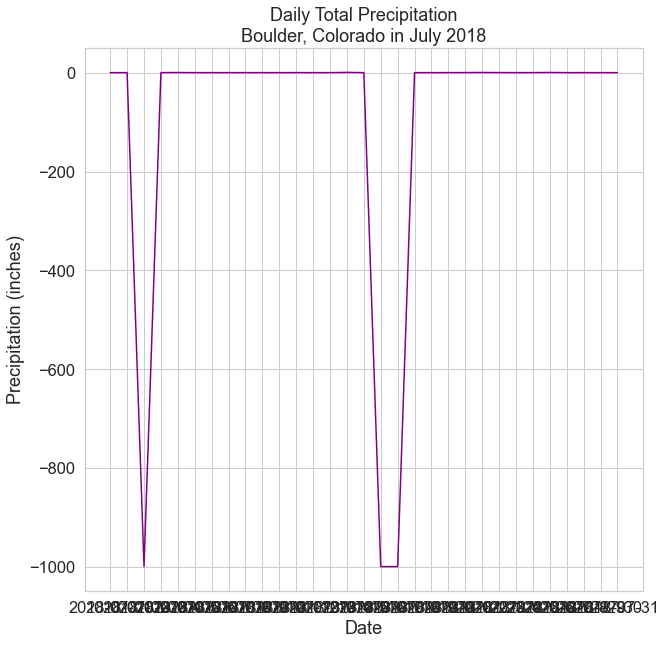

In [9]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(boulder_july_2018['date'],
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\n Boulder, CO in July 2018")

plt.show()


It can clearly be seen that, the precipitation column has a lot of negative values and as Python treats the date column as string, it struggles to place all the values in x-axis. It can easily be fixed if the dataframe is constucted like the below cell - 

In [16]:
boulder_july_2018 = pd.read_csv(file_path,
                                parse_dates=['date'],
                                index_col=['date'],
                                na_values = [-999])

boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24


In [17]:
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  31 non-null     int64  
 1   precip    28 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


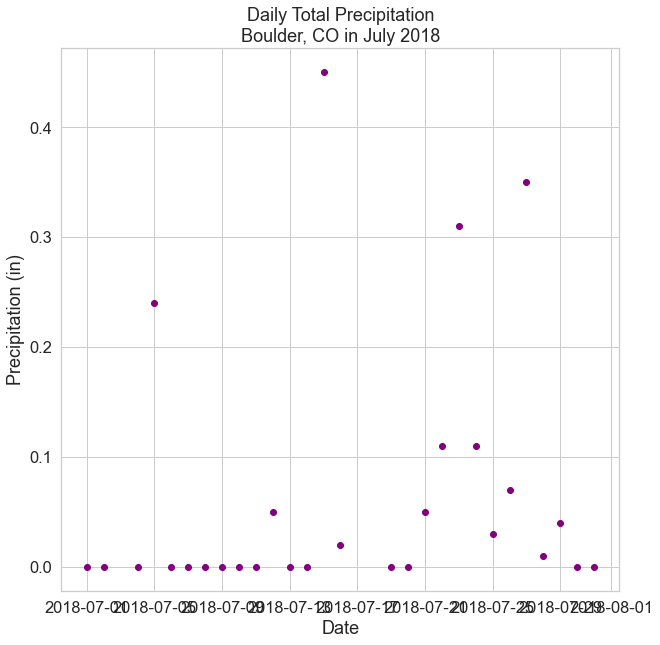

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (in)",
       title="Daily Total Precipitation\nBoulder, CO in July 2018")

plt.show()

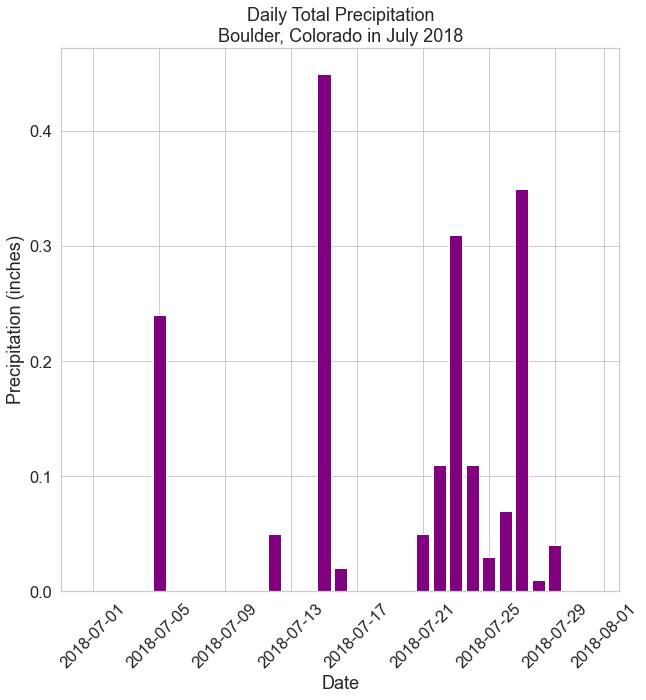

In [19]:
## BAR PLOT
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()